In [291]:
###########################################TP DECISION TREE#####################################################################
#############################################ANTOINE HABIS######################################################################


In [334]:
####################################QUESTION 1###############################""
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.externals.six import StringIO
from sklearn.model_selection import train_test_split # question 4
import numpy as np
import random
from numpy.random import RandomState
from scipy import stats
import math
import pydot
import graphviz
import pandas as pd
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/User/Anaconda3/Library/bin/graphviz'
data = pd.read_csv(r'C:\Users\Antoine\Downloads\training_data.csv')
target = pd.read_csv(r'C:\Users\Antoine\Downloads\training_class.csv')

clf = tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf = 0.01)
clf = clf.fit(data, target)

feature_names = ['ra','dec','u','g','r','i','z','run','rerun','camcol','field','specobjid','redshift','plate','mjd','fiberid']
class_names = ['STAR', 'GALAXY', 'QUASAR']

dot_data = tree.export_graphviz(clf, out_file = None, 
                         feature_names = feature_names,  
                         class_names = class_names,  
                         filled = True, rounded = True,  
                         special_characters = True)  


graphv = graphviz.Source(dot_data)  

# print the decision tree in a pdf file
from sklearn.externals.six import StringIO
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names = feature_names,  
                         class_names = class_names,  
                         filled=True, rounded=True,  
                         special_characters=True  
                    )
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("LabSession-DecisionTree.pdf")

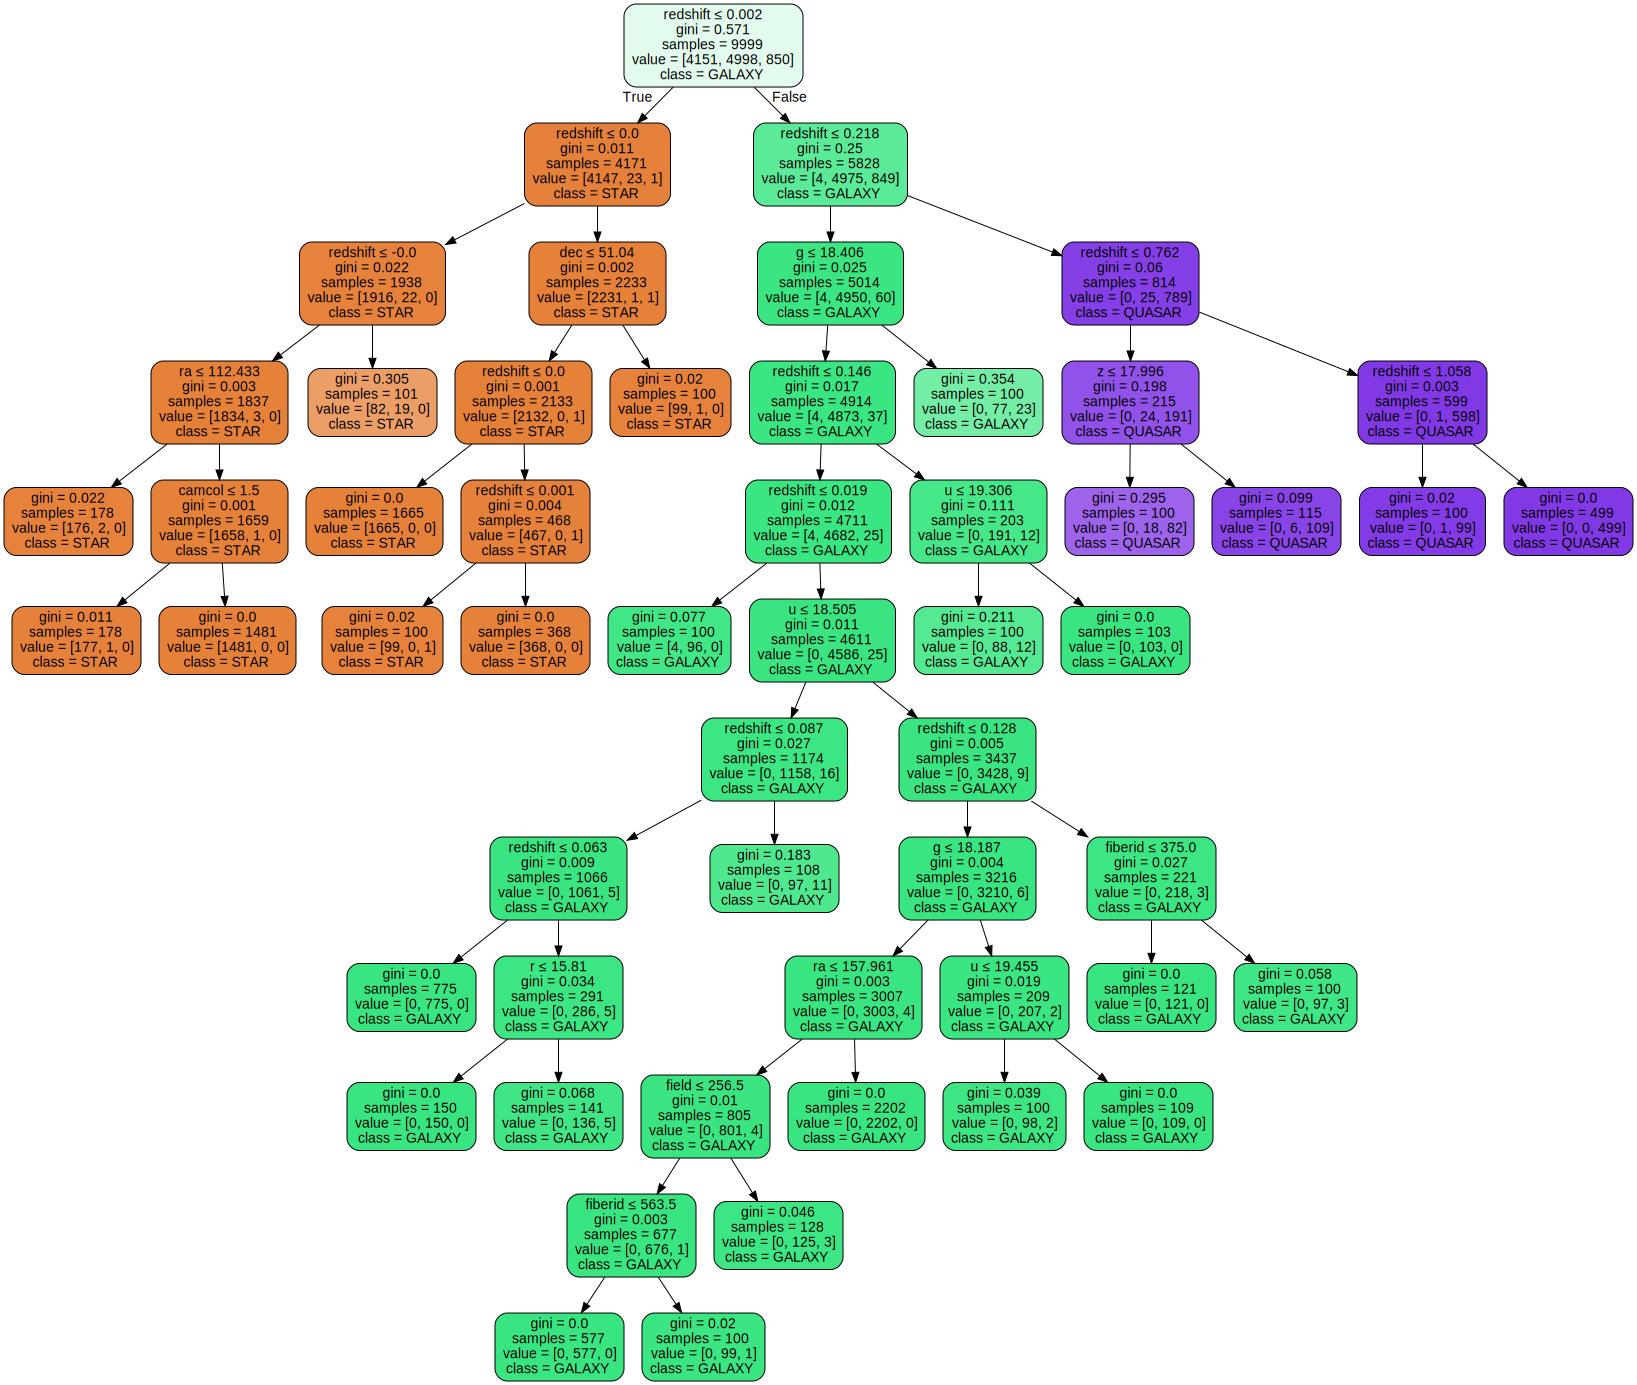

In [335]:
graphv

In [336]:
############################QUESTION 2#####################################

####clf .score donne le nombre d'estimation correctes divisé par le nombre de samples total
####1-clf.score correspond donc au taux d'erreur
Nb_Samples=9999
L=clf.tree_.children_left
k=0
for i in range (len(L)):
    if (L[i]==-1):
        k+=1
GEN_ERR2=(1-clf.score(data,target))*Nb_Samples+(k*0.5)
print(GEN_ERR2)

28
126.99999999999959


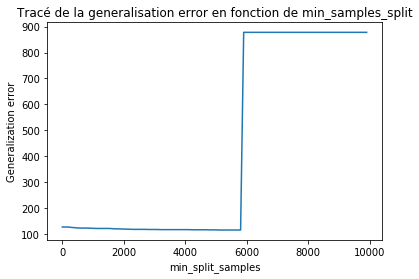

'========================> ****On trouve Generalization error minimum de 0.011451145****<========================================='

In [332]:
#######QUESTION3############################################################

###On remarque en premier qu'en mettant comme 
###critère l'entropy plutôt que le Gini la generalization error baisse 
###Cela s'explique de par le fait que le log est plus efficace sur de grosses et petites proportions (proche de 0 et de 1)


##commençons par étudier l'attribut min_samples_split:
##On remarque que dans la formule de generalisation error,
##il apparait le nombre de leaf, ainsi limiter le nombre de leaf est interessant pour faire baisser la genrealization error
##On peut limiter le nombre de leaf en indiquant un nombre minimum de samples nécessaire pour splitter élevé, ce que fait l'attribut
##min_samples_leaf. Cependant moins on split et plus il y aura d'erreurs, il faut donc trouver un entre deux pour bien minimiser
##le generalization error.


###On va donc tracer la generalisation error en fonction des valeurs de min_samples_leaf pour voir où se trouve le minimum:
x=np.arange(2,10000,100)
f=[]
for u in x:
    clf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf = 0.01,min_samples_split=u,min_impurity_decrease=0)
    clf = clf.fit(data, target)
    L=clf.tree_.children_left
    k=0
    for i in range (len(L)):
        if (L[i]==-1):
            k+=1
    GEN_ERR2=(1-clf.score(data,target))*Nb_Samples+(k*0.5)
    f.append(GEN_ERR2)
plt.plot(x,f)
plt.title("Tracé de la generalisation error en fonction de min_samples_split")
plt.xlabel("min_split_samples")
plt.ylabel("Generalization error")
plt.show()
### On observe que le minimum du GEN ERROR est atteint pour un min_samples_leaf autour des 5900
### On observe que le minimum du GEN ERROR est atteint pour un min_samples_leaf autour des 5900
###On effectue le même procédé pour les autres paramètres 
'========================> ****On trouve Generalization error minimum de 0.011451145****<========================================='

In [329]:
clf = tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf = 0.01,min_samples_split=5800)
clf = clf.fit(data, target)

dot_data = tree.export_graphviz(clf, out_file = None, 
                         feature_names = feature_names,  
                         class_names = class_names,  
                         filled = True, rounded = True,  
                         special_characters = True)  


graphv = graphviz.Source(dot_data)



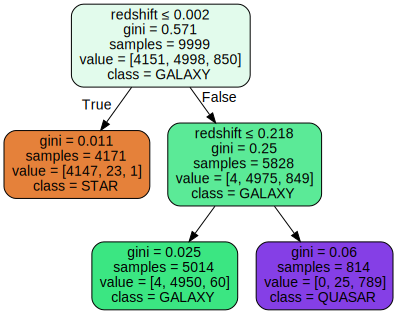

In [330]:
graphv


In [328]:
######QUESTION4#############################################################
##Le "decision tree" que l'on obtient lorsque l'on veut minimiser la generalisation error comprend 3 feuilles et 5 nodes 
##son training error vaut :
clf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf = 0.01,min_samples_split=5800)
clf = clf.fit(data, target)
print((1-clf.score(data,target)))
##Le "decision tree" que l'on obtient initialement contient 28 feuilles.
##don training_error vaut:
print((1-clf.score(data,target)))
#________________________________________________________________________________________________________
#####Le deux decisions tree ont donc exactement le même training error mais 
###l'un est beaucoup plus petit que l'autre et donc l'estimation sera beaucoup rapide, il faut donc préferer le second.


0.01130113011301126
0.01130113011301126


In [314]:
#####QUESTION5#########################"
###Nous allons essayer de prédire la nature d'une entité celeste à partir de notre decision tree.
def traduction_entité(M):
    if (M[0]==0):
        return ('STAR')
    if (M[0]==1):
        return('GALAXY')
    else:
        return ('QUASAR')
traduction_entité(clf.predict([[183.531325694133,0.0896930301317096,19.47406,17.0424,15.94699,15.50342,15.22531,752,301,4,267,3722360139651588096,-8.955967E-06,3306,54922,491]]))

'STAR'

In [306]:
####On remarque que lorsque l'on regarde dans csv skyserver, cet objet a pour réelle nature 'STAR';
##Il semblerait donc que le decision tree utilisé soit plutôt efficace


In [318]:
####################QUESTION6################################################
##"Notre decision tree ne comporte que que 3 feuilles et 5 noeuds en tout
##on remarque qu'il n'y a qu'un seul endroit possible où pruner et le fait de pruner nous amenerai à avoir uniquement 
##deux feuilles  il y aurait donc deux classes possibles seulement donc tous les élements de la classe qui n'apparait pas 
##dans le decision tree seraient mal estimés par ce decision tree donc la Generalisation error augmenterait enormément
##Il ne faut donc surtout pas pruner le decision tree obtenu

In [ ]:
#####################Question7################################################